In [1]:
import numpy as np
from saem import CSEMData
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
from pygimli.viewer.mpl import drawModel1D

In [2]:
df = 0.5  # 0.5/1 for half/full octave
fMin, fMax = 32, 25000
f = np.round(2**np.arange(0, np.log2(fMax/fMin), df) * fMin)
# f = np.hstack((f[3], f[5:-3], f[-2:]))
f = np.hstack((f[5:-3], f[-2:])) # , 32000, 64000))
print(f)

[  181.   256.   362.   512.   724.  1024.  1448.  2048.  2896.  4096.
  5793.  8192. 16384. 23170.]


In [3]:
x = np.arange(100, 801, 100)  # receiver positions
txLen = 1000  # length of the transmitter
# self = CSEMData(f=f, rx=x, ry=np.zeros_like(x), txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=30)
# RR: ry must be given now!
self = CSEMData(f=f, rx=x, ry=np.zeros_like(x), txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=30)
# RR: alt is not taken!
self.alt = np.ones_like(x) * 30
self.cmp = [1, 0, 1]
print(self)

CSEM data with 8 stations and 14 frequencies
Transmitter length 1000m
Median Rx distance 100.0m
Sounding pos at 100.000000,0.000000,30.000000,


None


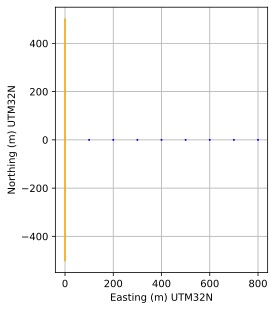

In [4]:
self.setPos(2, show=True)

In [5]:
rho = [200, 10, 100, 5]
thk = [10, 10, 10]
self.simulate(rho=rho, thk=thk)

In [6]:
# self.DATA = self.RESP  # + noise  # avoids what="response"
self.DATA = self.RESP.copy()
from numpy.random import randn
noiseLevel = 1e-3  # nV/A
sh = self.DATA.shape
noise = (randn(*sh) + randn(*sh) * 1j) * noiseLevel
self.DATA += noise

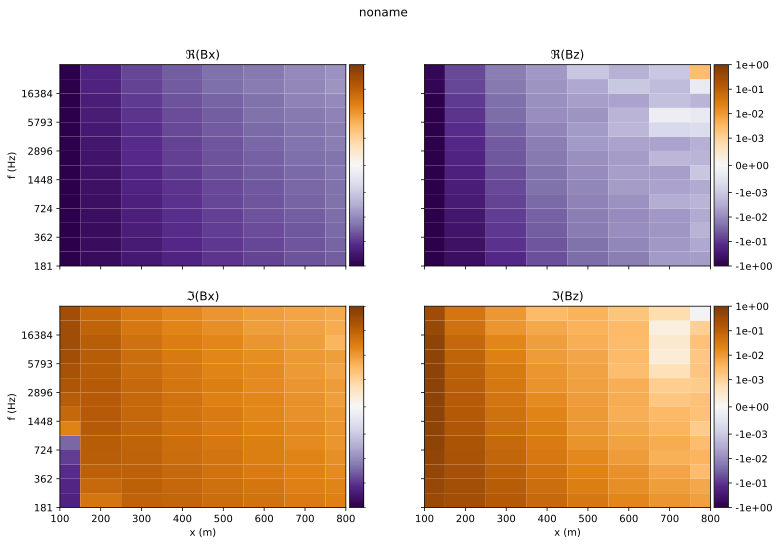

In [7]:
self.showLineData();

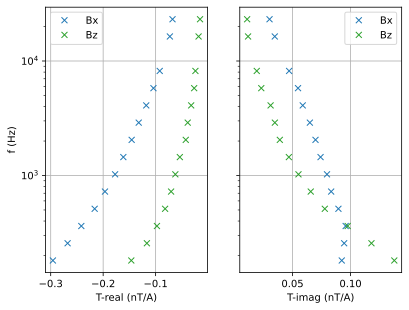

In [8]:
self.showSounding(2, amphi=False);  # what the hell! compare with SimpleModelling

In [9]:
# self.createDepthVector(rho=10)
self.depth = np.arange(0., 101, 3)
print(self.depth)

[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45. 48. 51.
 54. 57. 60. 63. 66. 69. 72. 75. 78. 81. 84. 87. 90. 93. 96. 99.]


12/07/23 - 18:59:39 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x00000204B526CA90>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000204B52685E0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000204B526CB80>
min/max (data): -0.3/0.14
min/max (error): 0.34%/9.18%
min/max (start model): 100/100
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 426.21 (dPhi = 97.45%) lam: 50
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 167.97 (dPhi = 59.18%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 47.36 (dPhi = 72.15%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 25.2 (dPhi = 47.28%) lam: 50.0
-------------------------------------------------------------------------------

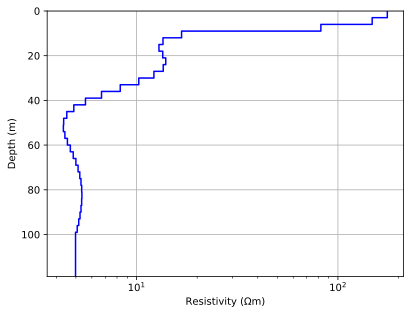

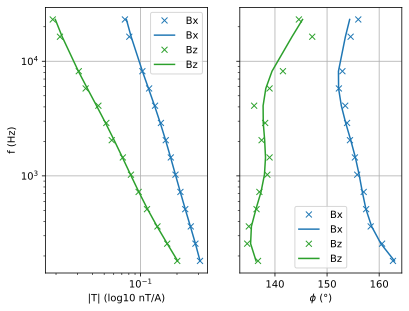

In [10]:
self.invertSounding(2, absError=noiseLevel, relError=0, blockyModel=1, lam=50, verbose=True);

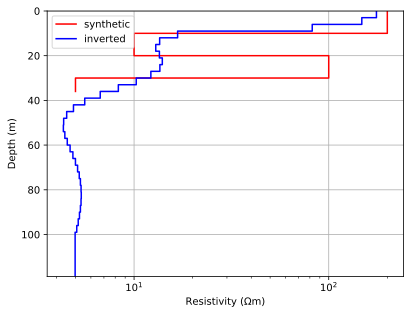

In [11]:
fig, ax = plt.subplots()
drawModel1D(ax, thk, rho, color="red", label="synthetic")
drawModel1D(ax, np.diff(self.depth), self.model, color="blue", plot='semilogx', label="inverted")
ax.legend();